# Test 5: 18 March (nighty whitey)

HEY BESTIE!!!! It's time for me to do some experimenty wenty shit! Tonight we are gonna be COOKING up some delicious standard-issue IV / DV "lab experiments". After the lovely free-for-all playtime of Test 4, we're going to test how 5 different improvements affect the data. Let's GO besties!!!!

All predictions during Test 5 will be verified with F1 score and MCC (Matthew's Correlation Coefficient) score.

Note: Test 5 is a separate notebook from Tests 1 - 4 because it's FOCKIN BIG.

## Test 5 General Code

In [1]:
import numpy as np
import os.path as path
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, ConfusionMatrixDisplay
import pandas as pd
import monke_features as mf
import monke_classify as mc
import monke_io as mio
import matplotlib.pyplot as plt

In [38]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

In [1]:
def prep_train_test_data(pose_data, labels, train_names, test_names=None, weights=None, test_size=0.2):
    training_data = []
    training_labels = []

    if weights is not None:
        training_weights = []

    testing_data = {}
    testing_labels = {}

    for name in train_names:
        pose_train = pose_data[name]
        labels_train = labels[name]

        if weights is not None:
            weights_train = weights[name]
            X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(pose_train, labels_train, weights_train, test_size=test_size)
            training_weights.append(z_train)
        else:
            X_train, X_test, y_train, y_test = train_test_split(pose_train, labels_train, test_size=test_size)

        training_data.append(X_train)
        training_labels.append(y_train)

        if test_names is not None:
            if name in test_names:
                testing_data[name] = X_test
                testing_labels[name] = y_test
        else:
            testing_data[name] = X_test
            testing_labels[name] = y_test
        
    if(len(training_data) > 1):
        training_data = np.concatenate(training_data)
        training_labels = np.concatenate(training_labels)
        if weights is not None:
            training_weights = np.concatenate(training_weights)
    else:
        training_data = training_data[0]
        training_labels = training_labels[0]
        if weights is not None:
            training_weights = training_weights[0]

    if weights is None:
        return training_data, testing_data, training_labels, testing_labels
    else:
        return training_data, testing_data, training_labels, testing_labels, training_weights

def prep_multi_train_test_data(pose_data, labels, train_names, test_names=None, weights=None, test_size=0.2):
    training_data = {}
    training_labels = {}

    if weights is not None:
        training_weights = {}

    testing_data = {}
    testing_labels = {}

    for name in train_names:
        pose_train = pose_data[name]
        labels_train = labels[name]

        if weights is not None:
            weights_train = weights[name]
            X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(pose_train, labels_train, weights_train, test_size=test_size)
            training_weights[name] = z_train
        else:
            X_train, X_test, y_train, y_test = train_test_split(pose_train, labels_train, test_size=test_size)

        training_data[name] = X_train
        training_labels[name] = y_train
        
        if test_names is not None:
            if name in test_names:
                testing_data[name] = X_test
                testing_labels[name] = y_test
        else:
            testing_data[name] = X_test
            testing_labels[name] = y_test

    if weights is None:
        return training_data, testing_data, training_labels, testing_labels
    else:
        return training_data, testing_data, training_labels, testing_labels, training_weights

def process_data(pose_data, labels, process):
    processed_data = {}
    processed_labels = {}

    for name in pose_data:
        processed_data[name] = process(pose_data[name])
        processed_labels[name] = labels[name][:processed_data[name].shape[0]]
    
    return processed_data, processed_labels

def test_classify(clf, test_data, test_labels):
    predicted_labels = clf.predict(test_data)
    mcc = matthews_corrcoef(test_labels, predicted_labels)
    f1 = f1_score(test_labels, predicted_labels)
    acc = accuracy_score(test_labels, predicted_labels)
    return {"predictions":predicted_labels, "mcc":mcc, "f1":f1, "accuracy":acc}

## Test 5A: Using More Data

**Aim**: Check if using a larger data set to train classifier improves predictions.

**Feature Tested**: Directional Change

**Noise Correction**: None

**Weights**: None

**Class Balance**: None

**Set 1**

_Training Data_
* Koi, April 11

_Testing Data_
* Koi, April 17
* Koi, April 25
* Koi, April 25 (3)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 2**

_Training Data_
* Koi, April 11 (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17
* Koi, April 25
* Koi, April 25 (3)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 3**

_Training Data_
* Koi, April 11
* Koi, April 17

_Testing Data_
* Koi, April 25
* Koi, April 25 (3)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 4**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25
* Koi, April 25 (3)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 5**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)
* Koi, April 25 (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 6**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 7**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5)
* Koi, April 25 (6)

**Set 8**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6)

**Set 9**

_Training Data_
* Koi, April 11 (80%)
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

_Testing Data_
* Koi, April 11 (20%)
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)

### Test 5A Overall

In [6]:
data_5a, labels_5a = process_data(pose_data_all, labels_all, mf.accel)

### Test 5A, Set 1

In [7]:
clf = RandomForestClassifier()

clf.fit(data_5a["koi_apr11"], labels_5a["koi_apr11"])

set1_results = {}

for name in data_5a:
    if name != "koi_apr11":
        set1_results[name] = test_classify(clf, data_5a[name], labels_5a[name])
        
# 13.9s
pd.DataFrame(set1_results)

,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.479252,0.443226,0.371381,0.30215,0.077686,0.160338
f1,0.642569,0.414011,0.415795,0.398148,0.212576,0.419355


### Test 5A, Set 2

In [8]:
clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(data_5a["koi_apr11"], labels_5a["koi_apr11"], test_size=0.2)
clf.fit(X_train, y_train)

set2_results = {}

for name in data_5a:
    if name != "koi_apr11":
        set2_results[name] = test_classify(clf, data_5a[name], labels_5a[name])
    else:
        set2_results[name] = test_classify(clf, X_test, y_test)
        
pd.DataFrame(set2_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.444354,0.472927,0.442206,0.389467,0.292485,0.079305,0.170863
f1,0.560554,0.637644,0.410533,0.431947,0.392157,0.214247,0.427119


### Test 5A, Set 3

In [9]:
clf = RandomForestClassifier()

training_data = np.concatenate((data_5a["koi_apr11"], data_5a["koi_apr17"]))
training_labels = np.concatenate((labels_5a["koi_apr11"], labels_5a["koi_apr17"]))

clf.fit(training_data, training_labels)

set3_results = {}

for name in data_5a:
    if name != "koi_apr11" and name != "koi_apr17":
        set3_results[name] = test_classify(clf, data_5a[name], labels_5a[name])
        
pd.DataFrame(set3_results)

,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.391197,0.445106,0.371653,0.059261,0.173926
f1,0.319917,0.48335,0.459909,0.1958,0.406534


### Test 5A, Set 4

In [10]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set4_results = {}

for name in testing_data:
    set4_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set4_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.431232,0.543538,0.380158,0.439837,0.359939,0.054543,0.159799
f1,0.547297,0.663988,0.301621,0.478883,0.445498,0.190323,0.390018


### Test 5A, Set 5

In [11]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17", "koi_apr25"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set5_results = {}

for name in testing_data:
    set5_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set5_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.390664,0.553596,0.612703,0.461575,0.454191,0.059241,0.209475
f1,0.521095,0.680831,0.614325,0.491607,0.536082,0.20062,0.451833


### Test 5A, Set 6

In [12]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set6_results = {}

for name in testing_data:
    set6_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set6_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.403761,0.517737,0.534382,0.483051,0.440117,0.054555,0.167996
f1,0.518868,0.646475,0.489426,0.514991,0.520059,0.18726,0.380769


### Test 5A, Set 7

In [13]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set7_results = {}

for name in testing_data:
    set7_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set7_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.387952,0.533491,0.519754,0.484214,0.421748,0.058637,0.17289
f1,0.501465,0.658141,0.479005,0.525084,0.496,0.189253,0.376471


### Test 5A, Set 8

In [14]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set8_results = {}

for name in testing_data:
    set8_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set8_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mcc,0.304451,0.393098,0.343502,0.320522,0.256853,0.054869,0.05114
f1,0.350106,0.462131,0.248629,0.316354,0.271605,0.115493,0.110957


### Test 5A, Set 9

In [15]:
clf = RandomForestClassifier()

train_names = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(data_5a, labels_5a, train_names)

clf.fit(training_data, training_labels)

set9_results = {}

for name in testing_data:
    set9_results[name] = test_classify(clf, testing_data[name], testing_labels[name])
        
pd.DataFrame(set9_results)

,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6
predictions,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
mcc,0.298975,0.407592,0.329605,0.268385,0.271473,0.014016,0.11691
f1,0.339085,0.472998,0.227027,0.266667,0.270833,0.082873,0.15894


### Test 5A Summary

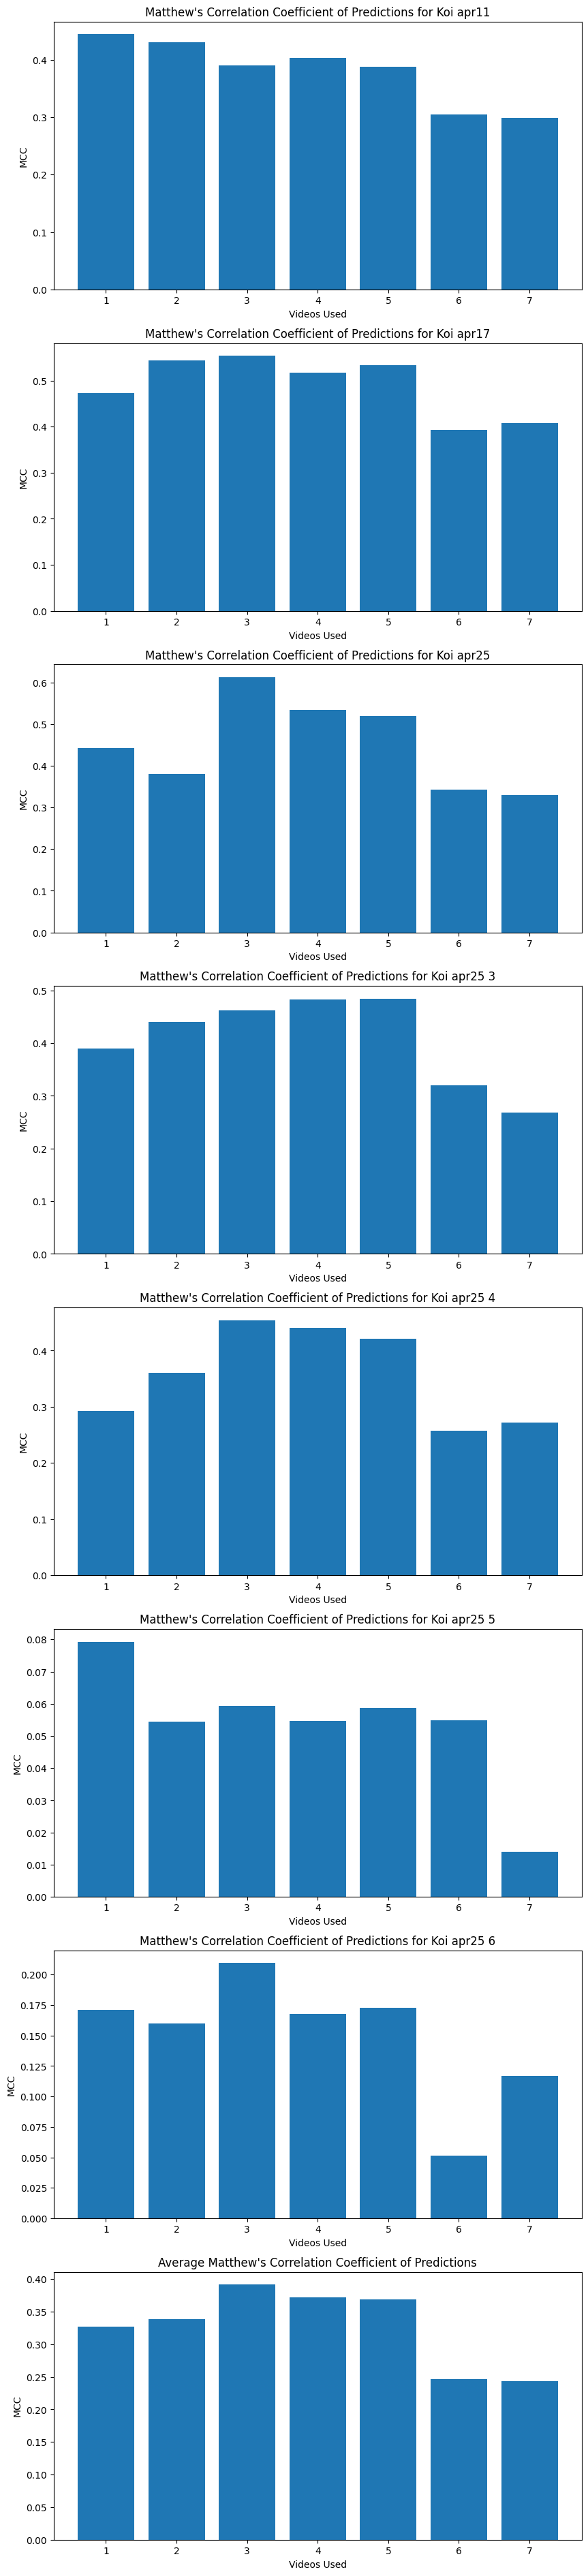

In [119]:
test5a_results = [set2_results, set4_results, set5_results, set6_results, 
                  set7_results, set8_results, set9_results]

fig, ax = plt.subplots(nrows=len(data_5a)+1, figsize=(10, 48))
row = 0
videos = list(range(1, len(test5a_results)+1))

mcc_avg_5a = np.zeros_like(test5a_results)

for name in data_5a:
    mcc_5a = [x[name]["mcc"] for x in test5a_results]
    mcc_avg_5a += mcc_5a

    ax[row].bar(videos, mcc_5a)
    ax[row].set_title(f"Matthew's Correlation Coefficient of Predictions for {name.replace('_', ' ').capitalize()}")
    ax[row].set_xlabel("Videos Used")
    ax[row].set_ylabel("MCC")
    row += 1

mcc_avg_5a /= len(test5a_results)
ax[row].bar(videos, mcc_avg_5a)
ax[row].set_title(f"Average Matthew's Correlation Coefficient of Predictions")
ax[row].set_xlabel("Videos Used")
ax[row].set_ylabel("MCC")

plt.show()

## Test 5B: Using More Features

**Aim**: Check which features can help classify tremors and normal movement the best.

**Feature(s) Tested**: Acceleration, Directional Change, 2D Angles, Change in 3D Angles, Change in Joint Angles

**Noise Correction**: None

**Weights**: None

**Class Balance**: None


**Datasets Used**

_Training Data_
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

_Testing Data_
* Koi, April 11
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)

In [17]:
joints = [(5, 7, 9), (6, 8, 10), (7, 5, 6), (8, 6, 5),
          (11, 13, 15), (12, 14, 16), (13, 11, 12), (14, 12, 11)]

processes = {"acceleration":mf.accel, "directional change":mf.dir_changes(30),
             "2d angles":mf.ang_changes, "change in 3d angles":mf.ang3d_changes,
             "joint angles":mf.change_in_joint_angle(joints)}

train_names = ["koi_apr17", "koi_apr25", "koi_apr25_3", 
               "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

results = {}

In [18]:
for process_name in processes:
    results[process_name] = {}
    processed_data, processed_labels = process_data(pose_data_all, labels_all, processes[process_name])
    training_data, testing_data, training_labels, testing_labels = prep_train_test_data(pose_data_all, labels_all, train_names)

    clf = RandomForestClassifier()
    clf.fit(training_data, training_labels)

    for name in testing_data:
        results[process_name][name] = test_classify(clf, testing_data[name], testing_labels[name])

results

/Users/Russell/Desktop/NUS School Stuff/Python/Y2S2/Monke/monke_features.py:91: RuntimeWarning: invalid value encountered in divide
  ang_changes = np.nan_to_num(np.arccos(np.nan_to_num(np.divide(uv, np.multiply(mag_u, mag_v)))))
/Users/Russell/Desktop/NUS School Stuff/Python/Y2S2/Monke/monke_features.py:91: RuntimeWarning: invalid value encountered in arccos
  ang_changes = np.nan_to_num(np.arccos(np.nan_to_num(np.divide(uv, np.multiply(mag_u, mag_v)))))


{'acceleration': {'koi_apr11': {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
   'mcc': 0.20234709600406522,
   'f1': 0.29586962629952235},
  'koi_apr17': {'predictions': array([0, 0, 0, ..., 1, 1, 1]),
   'mcc': 0.9954558044053297,
   'f1': 0.9968225147526101},
  'koi_apr25': {'predictions': array([0, 1, 0, ..., 0, 0, 0]),
   'mcc': 0.998781900960483,
   'f1': 0.9989189189189189},
  'koi_apr25_3': {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
   'mcc': 0.9930865864184176,
   'f1': 0.9934924078091106},
  'koi_apr25_4': {'predictions': array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

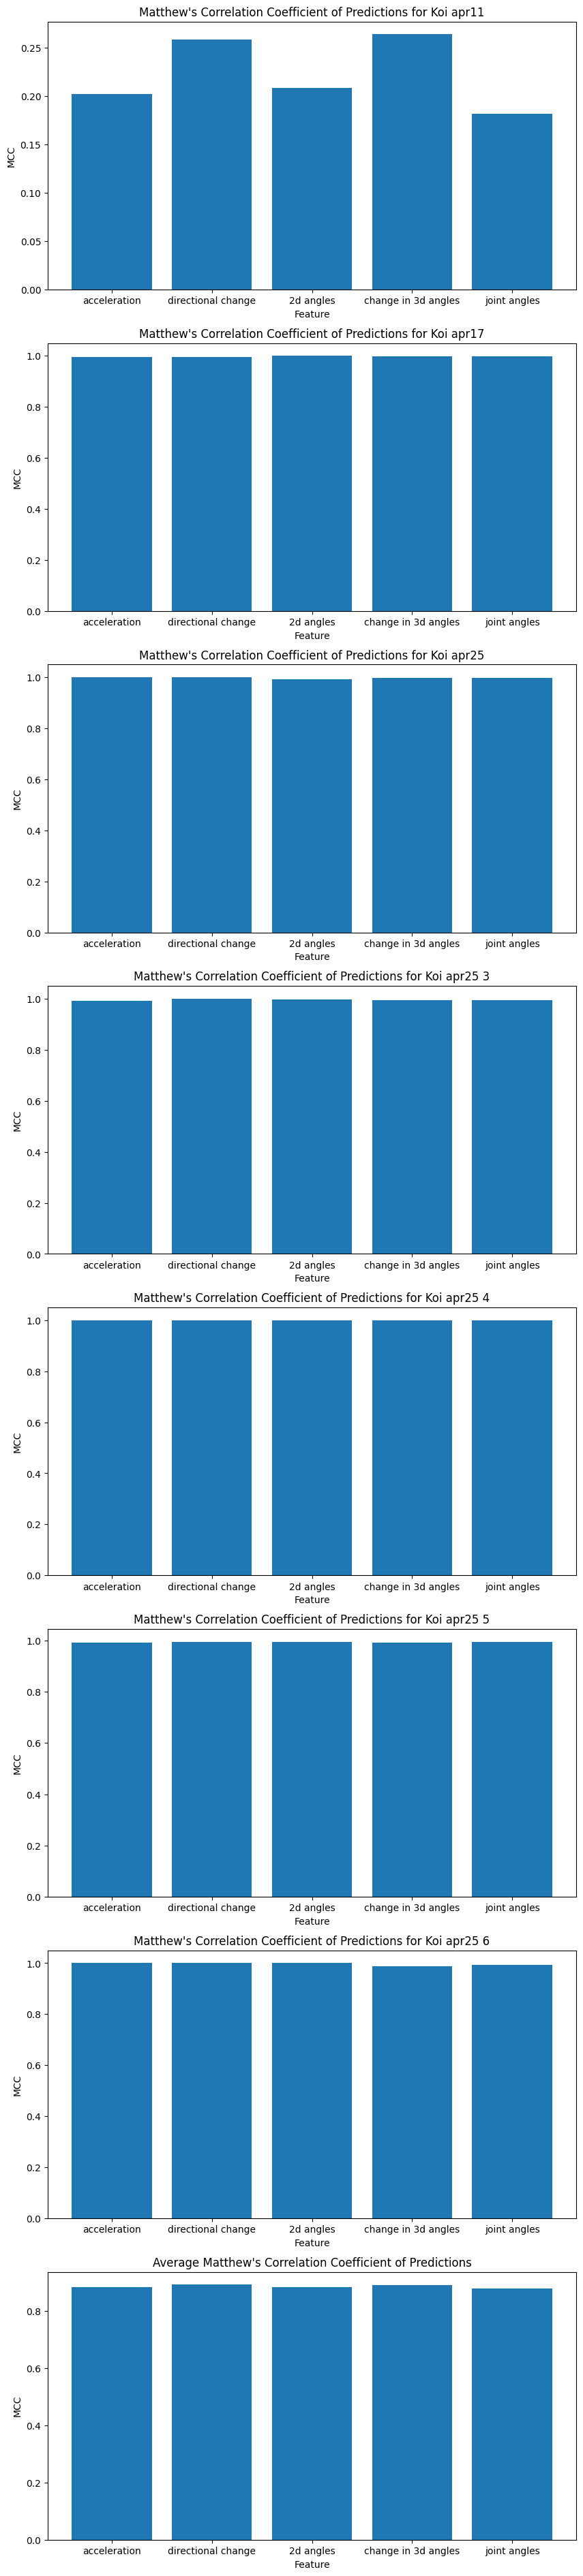

In [128]:
fig, ax = plt.subplots(nrows=len(pose_data_all)+1, figsize=(10, 48))
row = 0

mcc_avg_5b = np.zeros(len(results))
for name in pose_data_all:
    mcc_5b = [results[x][name]["mcc"] for x in results]
    mcc_avg_5b += mcc_5b

    ax[row].bar(processes.keys(), mcc_5b)
    ax[row].set_title(f"Matthew's Correlation Coefficient of Predictions for {name.replace('_', ' ').capitalize()}")
    ax[row].set_xlabel("Feature")
    ax[row].set_ylabel("MCC")
    row += 1

mcc_avg_5b /= len(pose_data_all)
ax[row].bar(processes.keys(), mcc_avg_5b)
ax[row].set_title(f"Average Matthew's Correlation Coefficient of Predictions")
ax[row].set_xlabel("Feature")
ax[row].set_ylabel("MCC")

plt.show()

## Test 5C: Using Noise Reduction

**Aim**: Check which sliding window size and threshold value produces the best results.

**Feature(s) Tested**: Directional Change

**Noise Correction**

_Thresholds_
* 0.0
* 0.1
* 0.2
* 0.3
* 0.4

_Sliding Window Sizes_
* 1
* 10
* 20
* 30 
* 40

**Weights**: None

**Class Balance**: None


### Dataset Information

**Datasets Used**

_Training Data_
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

_Testing Data_
* Koi, April 11
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)

_Trials Info_
* Repeated 10 times for every feature...

### Actual Code

In [8]:
train_names = ["koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4]
window_sizes = [1, 10, 20, 30, 40]

results_5c = {}

In [11]:
repeats = 10

for t in thresholds:
    for ws in window_sizes:
        results_5c[(t, ws)] = {}
        process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
        processed_data, processed_labels = process_data(pose_data_all, labels_all, process)

        for i in range(repeats):
            training_data, testing_data, training_labels, testing_labels = prep_train_test_data(processed_data, processed_labels, train_names)

            clf = RandomForestClassifier()
            clf.fit(training_data, training_labels)
            
            for name in testing_data:
                if name in results_5c[(t, ws)]:
                    results_5c[(t, ws)][name].append(test_classify(clf, testing_data[name], testing_labels[name]))
                else:
                    results_5c[(t, ws)][name] = [test_classify(clf, testing_data[name], testing_labels[name])]

In [15]:
results_5c

{(0.0,
  1): {'koi_apr11': [{'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.2683254602699584,
    'f1': 0.3127877617703847},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.20905097132912434,
    'f1': 0.3489511367918603},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.28731012751838986,
    'f1': 0.3426179823928417},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.2749638429626911,
    'f1': 0.3297470194824077},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.21637054113090393,
    'f1': 0.30598482719865133},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.20539443344090744,
    'f1': 0.3321619159182611},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.22277701884824294,
    'f1': 0.2940066753736758},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0.21344072504701236,
    'f1': 0.33512521305886983},
   {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
    'mcc': 0

In [12]:
visual_5c = []
var_5c = []

for t in thresholds:
    row_mcc = []
    row_var = []

    for ws in window_sizes:
        trial_results_5c = results_5c[(t, ws)]["koi_apr11"]
        mcc_5c = [x["mcc"] for x in trial_results_5c]
        row_mcc.append(np.mean(mcc_5c))
        row_var.append(np.var(mcc_5c))
        
    visual_5c.append(row_mcc)
    var_5c.append(row_var)

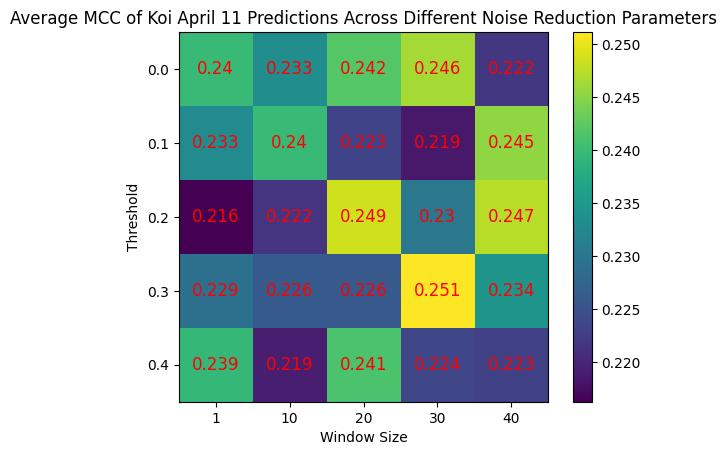

In [13]:
plt.imshow(visual_5c)

for i in range(len(visual_5c)):
    for j in range(len(visual_5c[i])):
        plt.text(j, i, round(visual_5c[i][j], 3), ha='center', va='center', color="red", size=12)

plt.title("Average MCC of Koi April 11 Predictions Across Different Noise Reduction Parameters")
plt.ylabel("Threshold")
plt.yticks(ticks=range(len(thresholds)), labels=thresholds)
plt.xlabel("Window Size")
plt.xticks(ticks=range(len(window_sizes)), labels=window_sizes)
plt.colorbar()
plt.show()

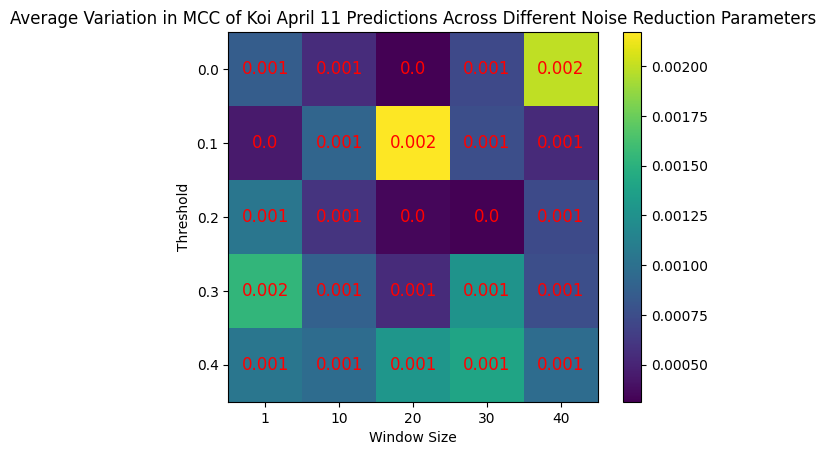

In [14]:
plt.imshow(var_5c)

for i in range(len(var_5c)):
    for j in range(len(var_5c[i])):
        plt.text(j, i, round(var_5c[i][j], 3), ha='center', va='center', color="red", size=12)

plt.title("Average Variation in MCC of Koi April 11 Predictions Across Different Noise Reduction Parameters")
plt.ylabel("Threshold")
plt.yticks(ticks=range(len(thresholds)), labels=thresholds)
plt.xlabel("Window Size")
plt.xticks(ticks=range(len(window_sizes)), labels=window_sizes)
plt.colorbar()
plt.show()

## Test 5D: Class Balancing

**Aim**: Test if class balancing to correct size imbalances between tremors and normal movement improves predictions.

**Feature(s) Tested**: Directional Change

**Noise Correction**: 0.1 threshold and 10 sliding window

**Weights**: None

**Class Balance**
* None
* Balanced
* Balanced Subsample


**Datasets Used**

_Training Data_
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

_Testing Data_
* Koi, April 11
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)

In [55]:
train_names = ["koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]
balance_types = [None, "balanced", "balanced_subsample"]
results_5d = {}

In [56]:
for balance_type in balance_types:
    results_5d[balance_type] = {}

    process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)
    processed_data, processed_labels = process_data(pose_data_all, labels_all, process)
    training_data, testing_data, training_labels, testing_labels = prep_train_test_data(pose_data_all, labels_all, train_names)

    clf = RandomForestClassifier(class_weight=balance_type)
    clf.fit(training_data, training_labels)

    for name in testing_data:
        results_5d[balance_type][name] = test_classify(clf, testing_data[name], testing_labels[name])

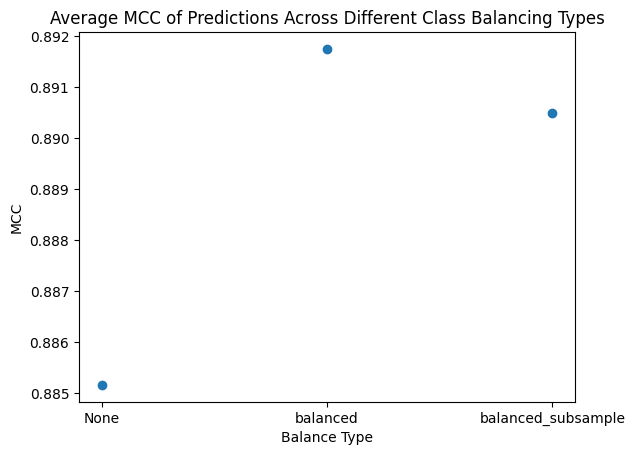

In [57]:
averages_5d = []
for b in balance_types:
    sum_b = 0
    count_b = 0
    for name in results_5d[b]:
        sum_b += results_5d[b][name]["mcc"]
        count_b += 1
    averages_5d.append(sum_b/count_b)

plt.scatter([str(b) for b in balance_types], averages_5d)
plt.title("Average MCC of Predictions Across Different Class Balancing Types")
plt.ylabel("MCC")
plt.xlabel("Balance Type")
plt.show()

## Test 5E: Weighting Pose Data

**Aim**: Test if weighting each 3D pose data point with likelihoods from DLC data improves predictions.

**Feature(s) Tested**: Directional Change

**Noise Correction**: 0.1 threshold and 10 sliding window

**Weights**: 2D DLC Likelihoods

**Class Balance**: Balanced


**Datasets Used**

_Training Data_
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

_Testing Data_
* Koi, April 11
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)

In [64]:
train_names = ["koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]
results_5e = {}

In [71]:
results_5e["weighted"] = {}
results_5e["unweighted"] = {}

weights_all = mio.read_weights_multi(names)

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)
processed_data, processed_labels = process_data(pose_data_all, labels_all, process)
training_data, testing_data, training_labels, testing_labels, training_weights = prep_train_test_data(pose_data_all, labels_all, train_names, weights=weights_all)

clf = RandomForestClassifier(class_weight="balanced")
clf.fit(training_data, training_labels, training_weights)

for name in testing_data:
    results_5e["weighted"][name] = test_classify(clf, testing_data[name], testing_labels[name])

clf.fit(training_data, training_labels)

for name in testing_data:
    results_5e["unweighted"][name] = test_classify(clf, testing_data[name], testing_labels[name])

Text(0.5, 0, 'Presence of Sample Weights')

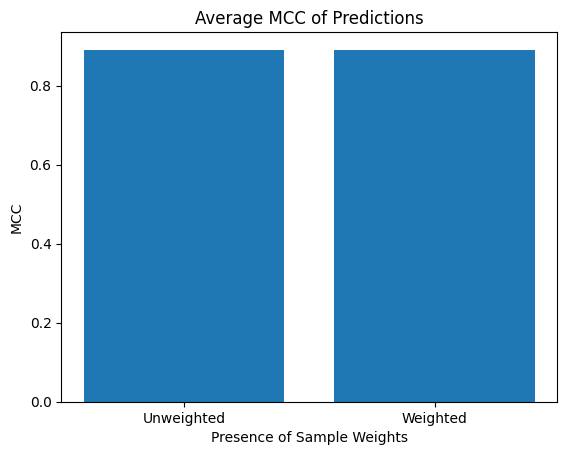

In [72]:
unweighted_avg_5e = 0
weighted_avg_5e = 0
count = 0

for name in testing_data:
    unweighted_avg_5e += results_5e["unweighted"][name]["mcc"]
    weighted_avg_5e += results_5e["weighted"][name]["mcc"]
    count += 1

unweighted_avg_5e /= count
weighted_avg_5e /= count

plt.bar(["Unweighted", "Weighted"], [unweighted_avg_5e, weighted_avg_5e])
plt.title("Average MCC of Predictions")
plt.ylabel("MCC")
plt.xlabel("Presence of Sample Weights")
plt.show()

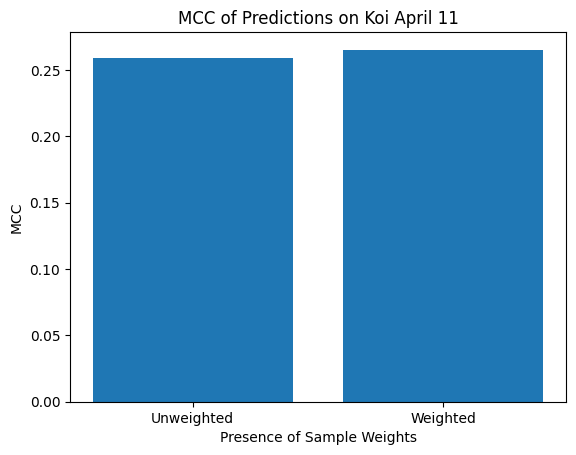

In [137]:
plt.bar(["Unweighted", "Weighted"], [results_5e["unweighted"]["koi_apr11"]["mcc"], results_5e["weighted"]["koi_apr11"]["mcc"]])
plt.title("MCC of Predictions on Koi April 11")
plt.ylabel("MCC")
plt.xlabel("Presence of Sample Weights")
plt.show()

## Test 5F: Monke Variation Time

**Aim**: Test how models trained on one marmoset's data fare on predicting that same marmoset's behaviour VS another marmoset's behaviour.

**Feature(s) Tested**: Directional Change

**Noise Correction**: 0.1 threshold and 10 sliding window

**Weights**: None

**Class Balance**: Balanced

### Datasets Information

**Set 1 (Koi Set)**

_Training Data_
* Koi, April 17 (80%)
* Koi, April 25 (80%)
* Koi, April 25 (3) (80%)
* Koi, April 25 (4) (80%)
* Koi, April 25 (5) (80%)
* Koi, April 25 (6) (80%)

**Set 2 (Boba Set)**

_Training Data_
* Boba, April 21 (80%)
* Boba, April 21 (2) (80%)
* Boba, April 25 (80%)
* Boba, April 25 (2) (80%)

**Sets 1 & 2**

_Testing Data_
* Koi, April 11
* Boba, April 11
* Koi, April 17 (20%)
* Koi, April 25 (20%)
* Koi, April 25 (3) (20%)
* Koi, April 25 (4) (20%)
* Koi, April 25 (5) (20%)
* Koi, April 25 (6) (20%)
* Boba, April 21 (20%)
* Boba, April 21 (2) (20%)
* Boba, April 25 (20%)
* Boba, April 25 (2) (20%)

### Actual Code

In [17]:
names2 = [*names, "boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_all2 = mio.read_poses(names2)
tremors_raw2 = mio.read_tremors_multi(names2)
labels_all2 = {}

for name in tremors_raw2:
    labels_all2[name] = mf.generate_labelled_frames(pose_data_all2[name], tremors_raw2[name])

In [18]:
train_names_set1 = ["koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]
train_names_set2 = ["boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]
results_5f = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

processed_data, processed_labels = process_data(pose_data_all2, labels_all2, process)
training_data, testing_data, training_labels, testing_labels = prep_train_test_data(pose_data_all2, labels_all2, train_names_set1)

processed_data2, processed_labels2 = process_data(pose_data_all2, labels_all2, process)
training_data2, testing_data2, training_labels2, testing_labels2 = prep_train_test_data(pose_data_all2, labels_all2, train_names_set2)

### Test 5F, Set 1

In [19]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(training_data, training_labels)

results_5f["set1"] = {}
for name in testing_data:
    results_5f["set1"][name] = test_classify(clf, testing_data[name], testing_labels[name])

### Test 5F, Set 2

In [20]:
clf.fit(training_data2, training_labels2)

results_5f["set2"] = {}
for name in testing_data2:
    results_5f["set2"][name] = test_classify(clf, testing_data2[name], testing_labels2[name])

In [27]:
set1_koi = 0
set1_boba = 0
set1_koi_count = 0
set1_boba_count = 0

for name in results_5f["set1"]:
    if "koi" in name:
        set1_koi += results_5f["set1"][name]["f1"]
        set1_koi_count += 1
    elif "boba" in name:
        set1_boba += results_5f["set1"][name]["f1"]
        set1_boba_count += 1

set1_koi /= set1_koi_count
set1_boba /= set1_boba_count

set2_koi = 0
set2_boba = 0
set2_koi_count = 0
set2_boba_count = 0

for name in results_5f["set2"]:
    if "koi" in name:
        set2_koi += results_5f["set2"][name]["f1"]
        set2_koi_count += 1
    elif "boba" in name:
        set2_boba += results_5f["set2"][name]["f1"]
        set2_boba_count += 1

set2_koi /= set2_koi_count
set2_boba /= set2_boba_count

matrix_5f = [[set1_koi, set1_boba], [set2_koi, set2_boba]]

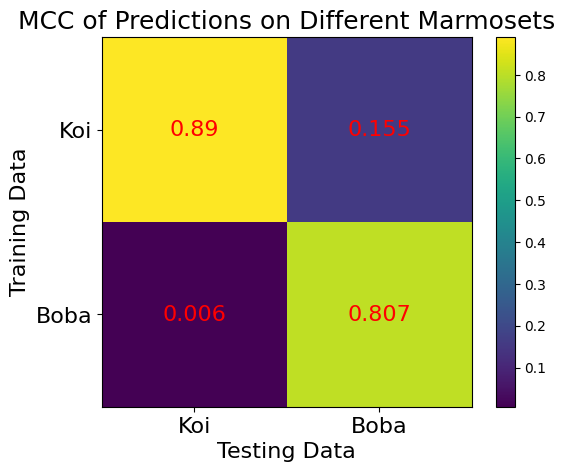

In [28]:
plt.imshow(matrix_5f, cmap='viridis', interpolation='nearest')

# Add text annotations for each matrix element
for i in range(len(matrix_5f)):
    for j in range(len(matrix_5f[i])):
        plt.text(j, i, round(matrix_5f[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("MCC of Predictions on Different Marmosets", size=18)

plt.xticks([0, 1], ["Koi", "Boba"], size=16)
plt.yticks([0, 1], ["Koi", "Boba"], size=16)

# Add a colorbar to show the scale
plt.colorbar()

# Show the plot
plt.show()

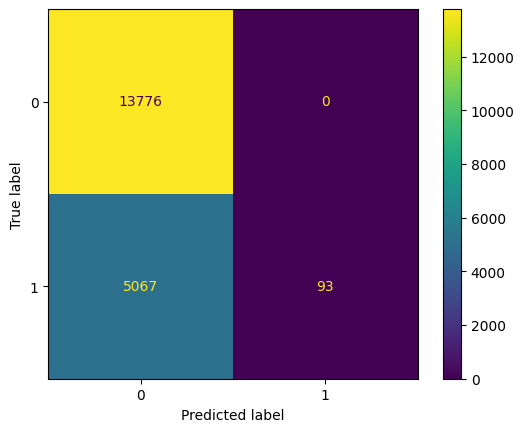

In [29]:
ConfusionMatrixDisplay.from_predictions(testing_labels2["koi_apr11"], results_5f["set2"]["koi_apr11"]["predictions"])
plt.show()

In [30]:
len(testing_labels2["koi_apr11"])

18936

In [31]:
len(labels_all["koi_apr11"])

18936